Weed herbicide resistance is one of the most pressing problems of modern agriculture. Weeds can spread across fields and cause substantial competition for limiting resources with crops. Stochastic weed population models are excellent tools in understanding and managing the spread of resistant weed species in agricultural and natural ecosystems. These models simulate the random processes that affect weed dispersal, germination, and survival, offering insights into how weed populations might evolve over time under different environmental conditions and management strategies. By incorporating randomness, models can more accurately reflect the inherent variability in biological systems.

In this exercise we will implement a simple two-dimensional model to simulate the population dynamics of a population of a resistant weed. The model simulates the germination of plants and dispersal of seeds over a specified area and time frame. It tracks the location of each seed and whether it has germinated or not, allowing for the visualization of the spatial distribution and growth over time that reveal hotspots of resistant weeds in the soil seed bank. The model will have the following assumptions:

- Weeds will be annual plants. This means that after producing offspring, germinated weeds are removed from the simulation. The success of the population rests entirely on the ability of the seeds of the resistant weeds to grow and generate their own offspring.

- Self-pollinating weeds.

- Annual herbicide application. This means that every year non-resistant plants will be killed by herbicide applications. Because of this assumption, non-resistant weeds don't need to be included in the simulation at all.


In [21]:
# Import modules
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output


In [22]:
# Model parameters
years = 25 # number of years
seeds_per_plant = 5 # viable seeds per plant
germination_rate = 0.05  # fraction of seeds that germinate
seed_bank = 5  # initial resistant seeds
dispersion_distance = 50  # dispersion distance from parent plant
x_max = 1000 # meters
y_max = 1000 # meters


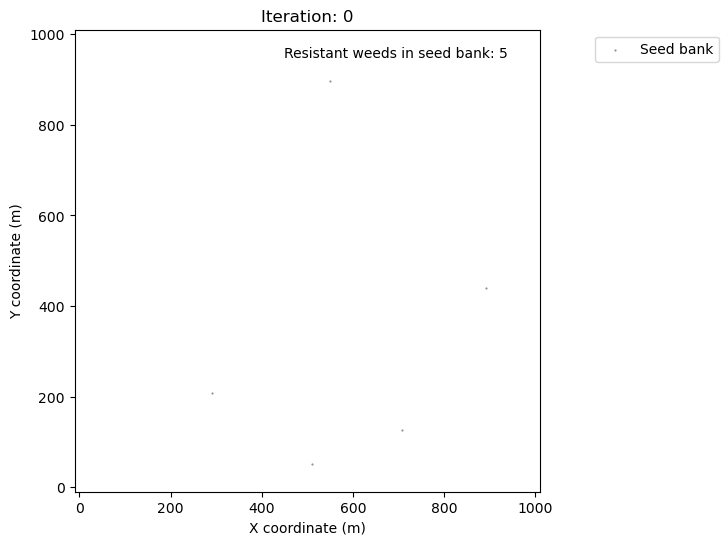

In [23]:
# Random seed for reproducibility
np.random.seed(3)

# Define initial seed bank
x = np.random.random(seed_bank) * x_max # Random X coordinates
y = np.random.random(seed_bank) * y_max # Random Y coordinates
germinated = np.zeros(seed_bank, dtype=bool)

# Create figure to visualize initial seeds
plt.figure(figsize=(6,6))
plt.title(f'Iteration: 0')
plt.scatter(x, y, s=1, marker='.', color='grey', label='Seed bank')
plt.xlabel('X coordinate (m)')
plt.ylabel('Y coordinate (m)')
plt.xlim([-10, x_max+10])
plt.ylim([-10, y_max+10])
plt.text(450,950,f"Resistant weeds in seed bank: {seed_bank}")
plt.legend(loc='upper right', bbox_to_anchor=(1.4,1))
plt.show()


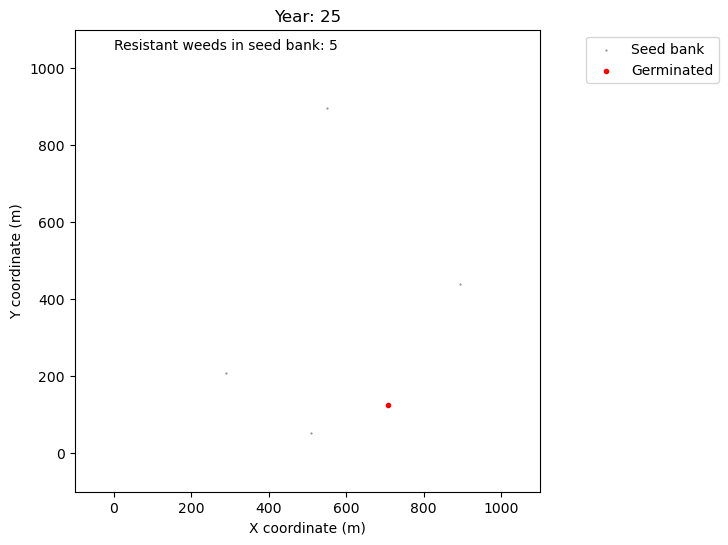

In [24]:
# Random seed for reproducibility
np.random.seed(1)

for t in range(years):
    
    clear_output(wait=True)
    plt.figure(figsize=(6,6))
    plt.title(f'Year: {t+1}')
    plt.xlabel('X coordinate (m)')
    plt.ylabel('Y coordinate (m)')
    plt.xlim([-100, x_max+100])
    plt.ylim([-100, y_max+100])
    
    # Plot entire seed bank
    plt.scatter(x, y, s=1, marker='.', color='grey', label='Seed bank')
    
    # Select seeds that germinate into plants
    seed_bank = x.shape[0] # Get updated number of seeds in the soil bank
    N_germinated = int(np.minimum(np.ceil(seed_bank * germination_rate), 100))
    idx_germinated = np.random.choice(range(seed_bank), N_germinated, replace=False)
    germinated[idx_germinated] = True
    plt.scatter(x[idx_germinated], y[idx_germinated], 
                marker='.', color='red', label='Germinated')
    
   
    # Generate new seeds for resistant plants one plant at the time
    x_new = np.array([])
    y_new = np.array([])
    germinated_new = np.array([], dtype=bool)
    
    for k in idx_germinated:
            
        # Generate coordinates for all new seeds for current plant
        x_new_plant = x[k] + dispersion_distance * np.random.randn(seeds_per_plant)
        y_new_plant = y[k] + dispersion_distance * np.random.randn(seeds_per_plant)
        germinated_new_plant = np.zeros(seeds_per_plant, dtype=bool)

        # Append new seeds to array storing all new seeds
        x_new = np.concatenate( (x_new, x_new_plant) )
        y_new = np.concatenate( (y_new, y_new_plant) )
        germinated_new = np.concatenate( (germinated_new, germinated_new_plant) )

    # Remove germinated seeds from seed bank
    x = np.delete(x, idx_germinated)
    y = np.delete(y, idx_germinated)
    germinated = np.delete(germinated, idx_germinated)

    # Append new seeds to seed bank
    x = np.concatenate( (x, x_new) )
    y = np.concatenate( (y, y_new) )
    germinated = np.concatenate( (germinated, germinated_new) )
    # Render figure
    plt.text(0,1050,f"Resistant weeds in seed bank: {seed_bank}")
    plt.legend(loc='upper right', bbox_to_anchor=(1.4,1))
    plt.show()
    
    time.sleep(0.5)


## References

Holst, N., Rasmussen, I.A. and Bastiaans, L., 2007. Field weed population dynamics: a review of model approaches and applications. Weed Research, 47(1), pp.1-14.

Trucco, F., Jeschke, M.R., Rayburn, A.L. and Tranel, P.J., 2005. Amaranthus hybridus can be pollinated frequently by A. tuberculatus under field conditions. Heredity, 94(1), pp.64-70.